In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
company = pd.read_csv('companies.csv')

In [4]:
company.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
company.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


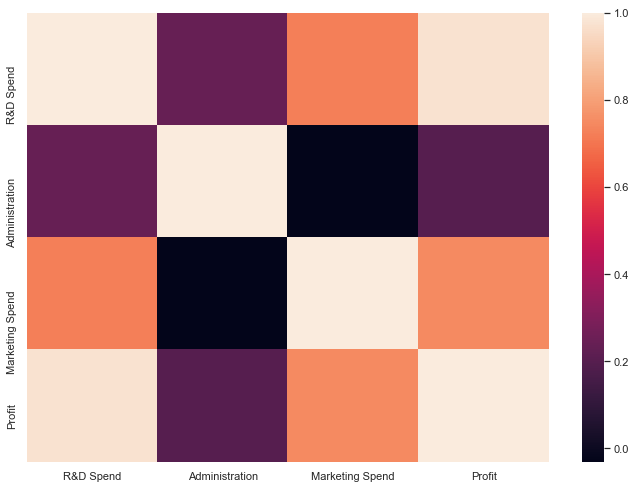

In [10]:
#At the diagonal we have same colors as they will have highest correlation i.e profit with profit etc
#profit is next highly related to i.e having more linearly correlation with RnD so RnD=x and y=profit 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(company.corr())

PROFIT HAS HIGHEST CORRELATION TO RnD FROM THIS HEATMAP

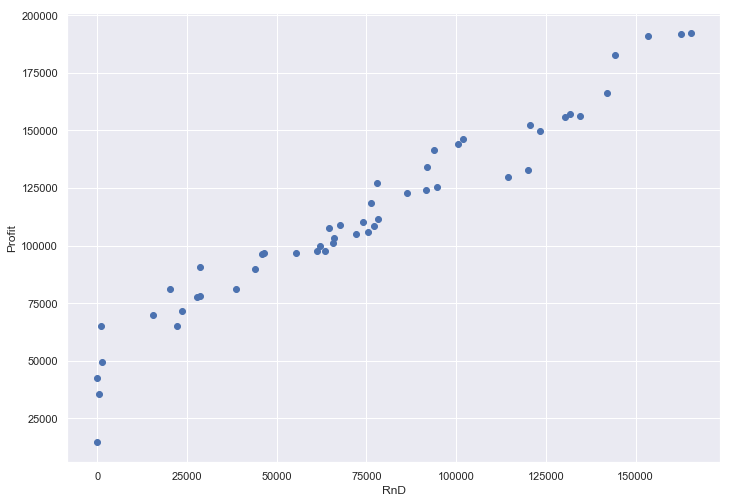

In [11]:
plt.scatter('R&D Spend','Profit',data=company)
plt.xlabel('RnD')
plt.ylabel('Profit')
plt.show()

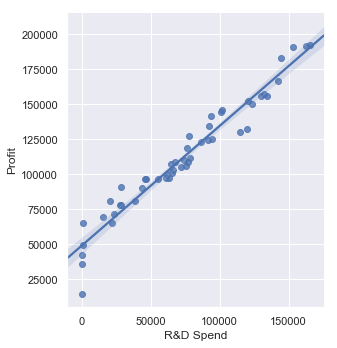

In [13]:
sns.lmplot('R&D Spend','Profit',data=company)

Thus we obtain the best fit line 

In [14]:
X=DataFrame(company['R&D Spend'])
Y=DataFrame(company['Profit'])

In [15]:
from sklearn.model_selection import train_test_split

In [22]:
#20% of rows are the test data.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [23]:
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(40, 1)
(10, 1)
(40, 1)
(10, 1)


In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
print (reg.intercept_)

[48416.29766139]


In [26]:
print (reg.coef_)

[[0.8516228]]


In [28]:
Y_pred= reg.predict(X_test)
Y_pred

array([[104667.27805998],
       [134150.83410578],
       [135207.80019517],
       [ 72170.54428856],
       [179090.58602508],
       [109824.77386586],
       [ 65644.27773757],
       [100481.43277139],
       [111431.75202432],
       [169438.14843539]])

In [30]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9464587607787219

This means we trained our model and predicted the outcome and the result of tested and predicted model was upto 0.94 i.e 94% correct